## Actividad Caso Student Score

Confeccione un notebook, ordenado y reproducible, en 
donde:
- 1. Realice un análisis exploratorio del set de datos. ¿Algún insight?
- 2. Implemente el algoritmo de descenso de gradiente para establecer un modelo regresivo lineal.
- 3. Determine métricas de ajuste y error del modelo

##### Respuesta:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('student_scores.csv')

#### Analisis Exploratorio

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Analisis Visual

Text(0, 0.5, 'Scores')

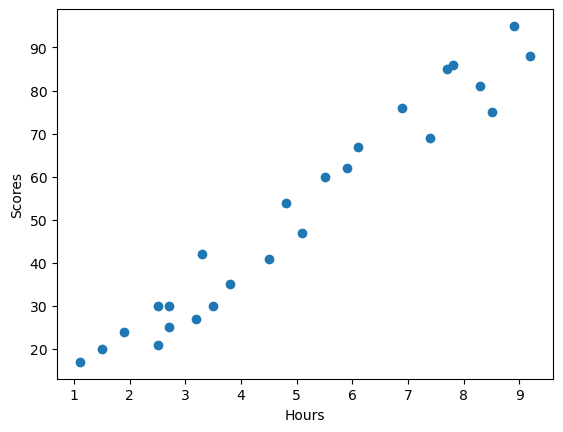

In [9]:
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')

Se ve que hay una tendencia lineal en el comportamiento de las vairables hours y Scores. Mientras más horas este un alumno estudiando, su calificacion será mejor.

- ### 2. Implemente el algoritmo de descenso de gradiente para establecer un modelo regresivo lineal.

In [17]:
# Supongamos los siguientes valores arbitrarios para theta_0 y theta_1
theta_0 = 1
theta_1 = 1

# a continuación hacemos predicciones con el modelo
h_theta = theta_0 + theta_1*X
h_theta

0      3.5
1      6.1
2      4.2
3      9.5
4      4.5
5      2.5
6     10.2
7      6.5
8      9.3
9      3.7
10     8.7
11     6.9
12     5.5
13     4.3
14     2.1
15     9.9
16     3.5
17     2.9
18     7.1
19     8.4
20     3.7
21     5.8
22     4.8
23     7.9
24     8.8
Name: Hours, dtype: float64

In [18]:
mse = sum((y - h_theta)**2) / (2*len(y))
print(f'El MSE para theta_0={theta_0} y theta_1={theta_1} es {mse}')

El MSE para theta_0=1 y theta_1=1 es 1283.8166


In [19]:
# podemos probar con otros valores, acá hemos obtenido un mejor resultado
theta_0 = -2
theta_1 = 3
h_theta = theta_0 + theta_1*X
mse = sum((y - h_theta)**2) / (2*len(y))
print(f'El MSE para theta_0={theta_0} y theta_1={theta_1} es {mse}')

El MSE para theta_0=-2 y theta_1=3 es 893.9254


In [20]:
# podemos seguir intentando, conseguimos mejorar nuevamente
theta_0 = -1
theta_1 = 2
h_theta = theta_0 + theta_1*X
mse = sum((y - h_theta)**2) / (2*len(y))
print(f'El MSE para theta_0={theta_0} y theta_1={theta_1} es {mse}')

El MSE para theta_0=-1 y theta_1=2 es 1100.7463999999998


- ### 3. Determine métricas de ajuste y error del modelo

In [11]:
# implementación en python

# calcula el valor predicho y
def h(theta, X):
  h = theta[0]  + theta[1] * X
  return h;

# definimos la funcion de costo en base al mse
def cost(theta, X, y):
  m = len(y)
  mse = 1 / (2*m) * sum((h(theta, X) - y)**2)
  return mse


def gradient_descent(theta, X, y, alpha=0.01):

  # nuevo theta, actualizado
  new_theta = [0,0]

  # cantidad de instancias
  m = len(y)

  new_theta[0] = theta[0] - alpha * 1/m * sum( h(theta, X) - y )
  new_theta[1] = theta[1] - alpha * 1/m * sum( (h(theta, X) - y) * X )

  return new_theta

In [12]:
X=df['Hours']
y=df['Scores']

In [13]:
# comprobando la funcion de costo
print(cost([1,4], X, y))

579.5936


In [14]:
# inicializacion aleatoria de theta
theta = [0,0]

# learning rate
alpha = 0.01

# iteraciones
epochs = 10000

costs = []
for i in range(epochs):
  theta = gradient_descent(theta, X, y, alpha)
  loss = cost(theta, X, y)
  costs.append(loss)

print("Loss:", costs[-1], "Theta:", theta)

Loss: 14.441365254622738 Theta: [2.4836734009718473, 9.775803391497918]


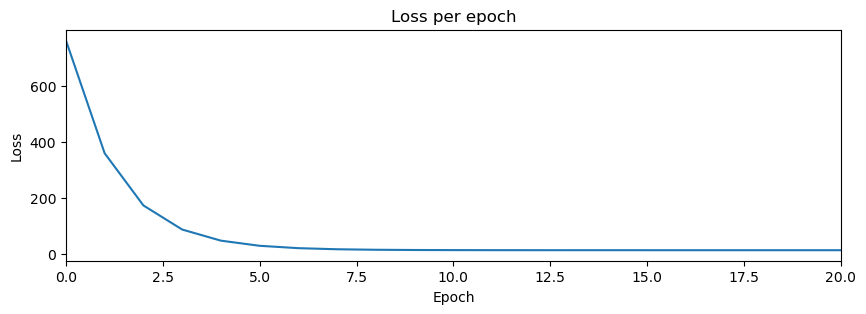

In [15]:
plt.figure(figsize=(10,3))
plt.title('Loss per epoch')
plt.plot(costs)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim([0,20])
plt.show()